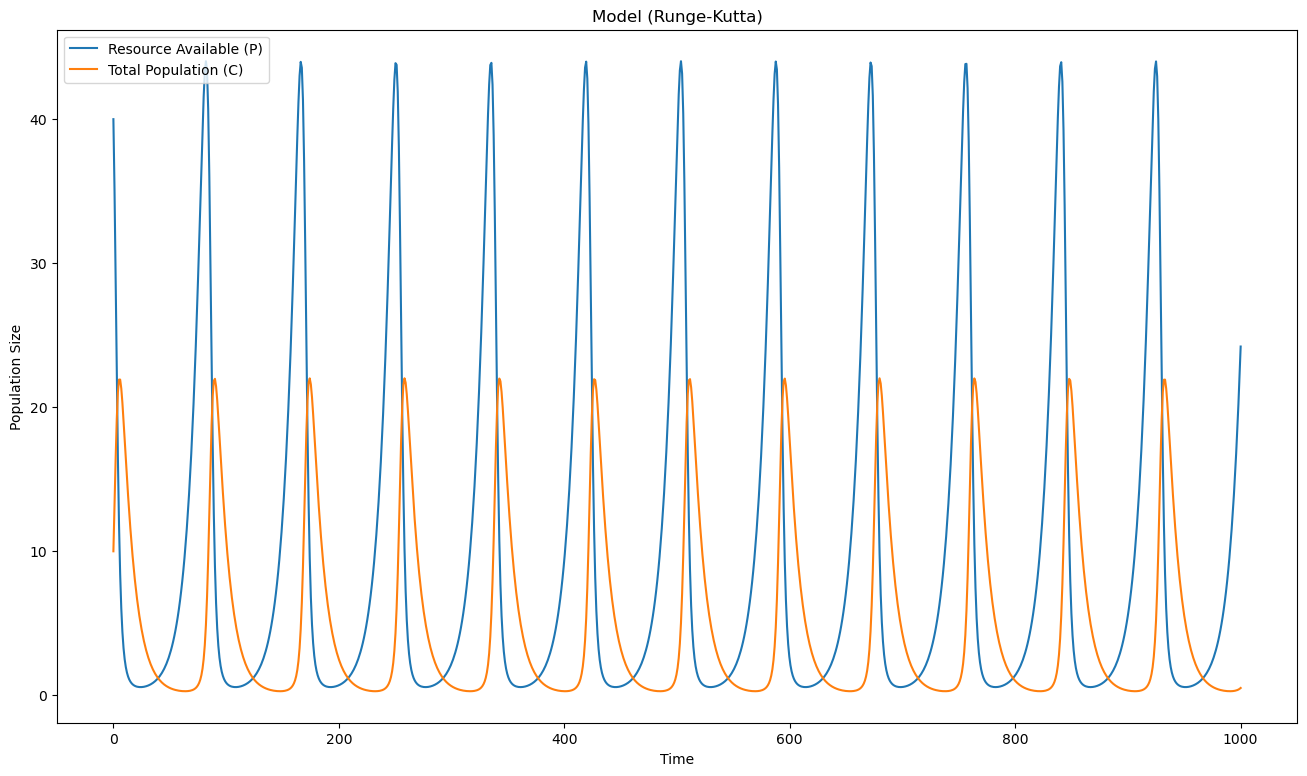

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# Model 
def system(t, y, r, a, s, b):
    P, C = y
    dPdt = r * P - a * P * C
    dCdt = b * P * C - s * C
    return np.array([dPdt, dCdt])

# Fourth-order Runge-Kutta
def runge_kutta(h, t, y, r, a, s, b):
    k1 = h * system(t, y, r, a, s, b)
    k2 = h * system(t + h / 2, y + k1 / 2, r, a, s, b)
    k3 = h * system(t + h / 2, y + k2 / 2, r, a, s, b)
    k4 = h * system(t + h, y + k3, r, a, s, b)
    return y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

# Initial Populations
P0 = 40 # Initial Resource Available
C0 = 10 # Initial Total Population
initial_conditions = np.array([P0, C0])

# Parameters
r = 0.1  # Resource Growth Rate
a = 0.02  # Birth Rate
s = 0.1  # Population Decrease Rate
b = 0.01  # Consumption Rate

# Time Parameters
t_start = 0
t_end = 1000
num_points = 1000
h = (t_end - t_start) / num_points

# Initialize arrays to store results
t_values = np.linspace(t_start, t_end, num_points)
solution_rk = np.zeros((num_points, 2))

# Runge-Kutta Calculations
solution_rk[0, :] = initial_conditions
for i in range(1, num_points):
    solution_rk[i, :] = runge_kutta(h, t_values[i-1], solution_rk[i-1, :], r, a, s, b)

# Plot
plt.figure(figsize=(16,9))
plt.plot(t_values, solution_rk[:, 0], label='Resource Available (P)')
plt.plot(t_values, solution_rk[:, 1], label='Total Population (C)')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.title('Model (Runge-Kutta)')
plt.legend(loc="upper left")
plt.show()